In [81]:
# importing processing and pre-processing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#importing libraries for visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model

#importing libraries for splitting the data
from sklearn.model_selection import train_test_split

#importing libraries for training the model
from keras import models, layers

#importing libraries for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#importing the library for displaying assets
from IPython.display import Image, display

In [82]:
# setting up the directory of the input dataset
# labelling different classes

import os

labels = os.listdir('../input/natural-images/data/natural_images/')
print(labels)

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']



 =====   MOTORBIKE   =====


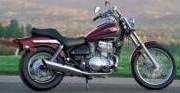

count : 788 images , label : motorbike class

 =====   AIRPLANE   =====


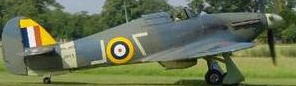

count : 727 images , label : airplane class

 =====   FLOWER   =====


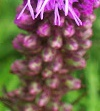

count : 843 images , label : flower class

 =====   DOG   =====


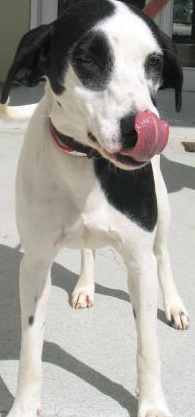

count : 702 images , label : dog class

 =====   FRUIT   =====


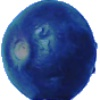

count : 1000 images , label : fruit class

 =====   CAR   =====


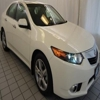

count : 968 images , label : car class

 =====   CAT   =====


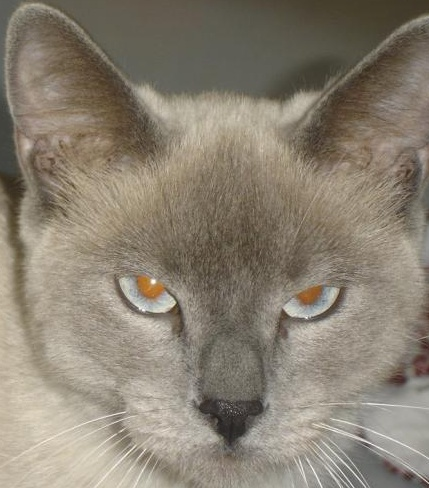

count : 885 images , label : cat class

 =====   PERSON   =====


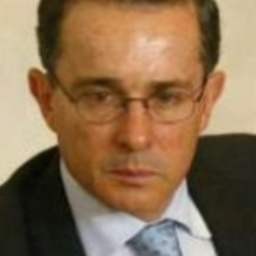

count : 986 images , label : person class


In [83]:
# Displaying 1 image from each class

num = []
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n',f'=====   {label.upper()}   =====')
    for image_path in folder_data:
        if k < 1:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print(f'count : {k} images , label : {label} class')

In [84]:
# Visualizing number of images in each class via bar graph

fig = go.Figure(data=[go.Bar(
            x=labels, y=num,
            text=num,
            textposition='auto',
        )])
fig.update_layout(title_text='NUMBER OF IMAGES CONTAINED IN EACH CLASS')
fig.show()

In [85]:
# converting the images into numpy array
# showing shapes and standardizing the input data

x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)
        pass
    pass

x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')/255

the shape of X is:  (6899, 32, 32, 3) and that of Y is:  (6899,)


In [86]:
# encoding the labelled y data into categorical data

y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)
print(y_encoded)
print(y_categorical)

[6 6 6 ... 7 7 7]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [87]:
# shuffling the data 

r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [88]:
print(X_train)
print(X_test)

[[[[0.5411765  0.5686275  0.5411765 ]
   [0.654902   0.6745098  0.63529414]
   [0.5137255  0.5058824  0.47843137]
   ...
   [0.6117647  0.63529414 0.6313726 ]
   [0.654902   0.6784314  0.6745098 ]
   [0.654902   0.6784314  0.6745098 ]]

  [[0.5686275  0.58431375 0.56078434]
   [0.7529412  0.7372549  0.68235296]
   [0.7372549  0.6901961  0.62352943]
   ...
   [0.6431373  0.6666667  0.6627451 ]
   [0.64705884 0.67058825 0.6666667 ]
   [0.5764706  0.6        0.59607846]]

  [[0.73333335 0.72156864 0.7019608 ]
   [0.9607843  0.93333334 0.85882354]
   [0.9529412  0.9019608  0.8156863 ]
   ...
   [0.6666667  0.6901961  0.6862745 ]
   [0.7137255  0.7372549  0.73333335]
   [0.67058825 0.69411767 0.6901961 ]]

  ...

  [[0.4745098  0.53333336 0.5411765 ]
   [0.53333336 0.6        0.6039216 ]
   [0.49019608 0.5568628  0.5686275 ]
   ...
   [0.4        0.42352942 0.41960785]
   [0.59607846 0.6117647  0.6117647 ]
   [0.2784314  0.35686275 0.36862746]]

  [[0.5803922  0.62352943 0.627451  ]
   [0.5

In [89]:
print(Y_test)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [90]:
# creating CNN model

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [91]:
# compliling CNN model

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [92]:
# testing the CNN model

history = model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
116/116 [==============================] - 1s 6ms/step - loss: 1.2980 - accuracy: 0.5310 - val_loss: 0.8050 - val_accuracy: 0.7081
Epoch 2/20
116/116 [==============================] - 1s 4ms/step - loss: 0.7062 - accuracy: 0.7468 - val_loss: 0.5733 - val_accuracy: 0.7773
Epoch 3/20
116/116 [==============================] - 1s 4ms/step - loss: 0.5359 - accuracy: 0.8104 - val_loss: 0.4820 - val_accuracy: 0.8259
Epoch 4/20
116/116 [==============================] - 1s 5ms/step - loss: 0.4438 - accuracy: 0.8404 - val_loss: 0.3919 - val_accuracy: 0.8659
Epoch 5/20
116/116 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.8696 - val_loss: 0.3856 - val_accuracy: 0.8681
Epoch 6/20
116/116 [==============================] - 1s 4ms/step - loss: 0.3293 - accuracy: 0.8767 - val_loss: 0.3385 - val_accuracy: 0.8649
Epoch 7/20
116/116 [==============================] - 1s 4ms/step - loss: 0.2783 - accuracy: 0.8913 - val_loss: 0.4554 - val_accuracy: 0.8497
Epoch 

In [93]:
# calculating the accuracy of the CNN model

Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test = np.argmax(Y_test, axis = 1)
accuracy_score(Y_pred,Y_test)

0.8985507246376812

In [94]:
# classification report based on various performance parameters

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       261
           1       0.95      0.91      0.93       293
           2       0.70      0.84      0.76       285
           3       0.70      0.54      0.61       224
           4       0.86      0.91      0.89       286
           5       0.99      1.00      0.99       338
           6       0.98      0.95      0.97       266
           7       0.99      0.99      0.99       324

    accuracy                           0.90      2277
   macro avg       0.89      0.89      0.89      2277
weighted avg       0.90      0.90      0.90      2277



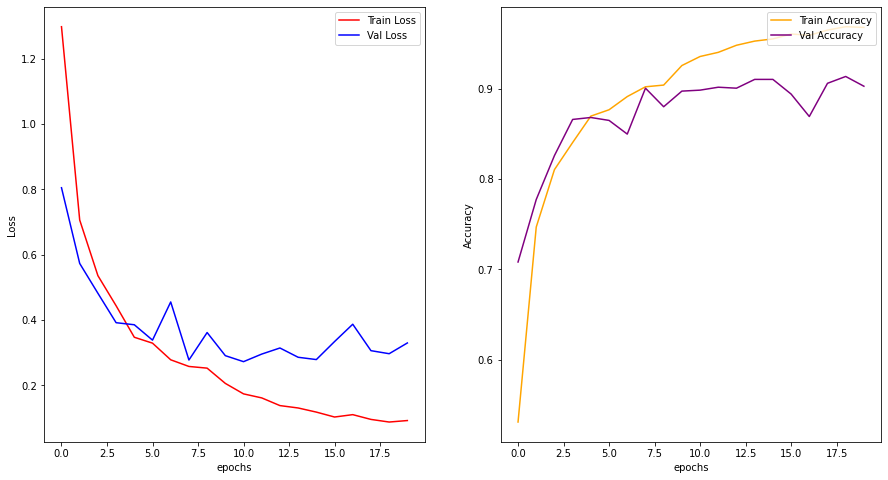

In [95]:
# visualizing the results using graphs

plt.figure(figsize = (15,8))
loss_ax = plt.subplot(1,2,1)
loss_ax.plot(history.history['loss'],'red', label = 'Train Loss')
loss_ax.plot(history.history['val_loss'],'blue', label = 'Val Loss')

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('Loss')

loss_ax.legend(loc = 'upper right')

acc_ax = plt.subplot(1,2,2)
acc_ax.plot(history.history['accuracy'],'orange', label = 'Train Accuracy')
acc_ax.plot(history.history['val_accuracy'],'purple', label = 'Val Accuracy')

acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('Accuracy')

acc_ax.legend(loc = 'upper right')
plt.show()

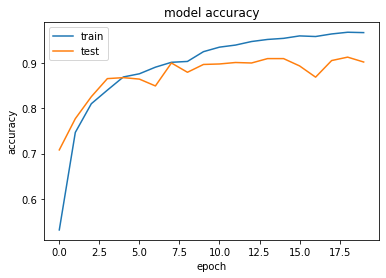

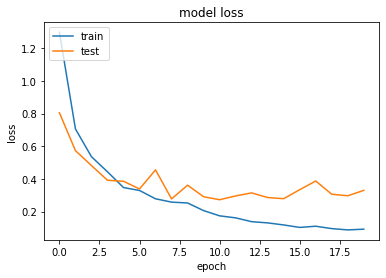

In [96]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model accuracy.png')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss.png')
plt.show()